# Analisando classificação das imagens de `outras.zip`

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Dict, Tuple

from zipfile import ZipFile
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.feature import local_binary_pattern

sns.set()
plt.gray()

# Parâmetros do LBP
METHOD = 'nri_uniform'
RADIUS = 1
N_POINTS = 8

TARGET_NAMES = {'normal': 0,
                'broca':1,
                'fissura': 2,
                'musgo': 3}

TARGETS = ['normal', 'broca', 'fissura', 'musgo']

<Figure size 432x288 with 0 Axes>

In [2]:
path_list = []
with ZipFile('./outras-2.zip') as zip_file:
  for path in zip_file.namelist():
    if '__MAC' not in path \
        and '.JPG' in path:
      path_list.append(f'./outras-2.zip/{path}')

data_dict:Dict[str, Tuple[float, np.ndarray, np.ndarray, np.ndarray]] = {}

for path in path_list:
  img = imread(path, as_gray=True)

  t_otsu = threshold_otsu(img)
  img_otsu = img >= t_otsu

  lbp = local_binary_pattern(image=img_otsu, P=N_POINTS, R=RADIUS, method=METHOD)

  hist = pd.Series(lbp.flatten()).value_counts().sort_index()

  arr:np.ndarray = np.zeros(59)
  for i in hist.index:
    arr[int(i)] = hist[i]
  
  # df = pd.DataFrame(data=[arr])
  data_dict[path] = (t_otsu, arr, lbp, img_otsu)

Probabilidades:
normal:0.2251232158432093
broca:0.30597191204510443
fissura:0.3331467191307601
musgo:0.1357581529809265


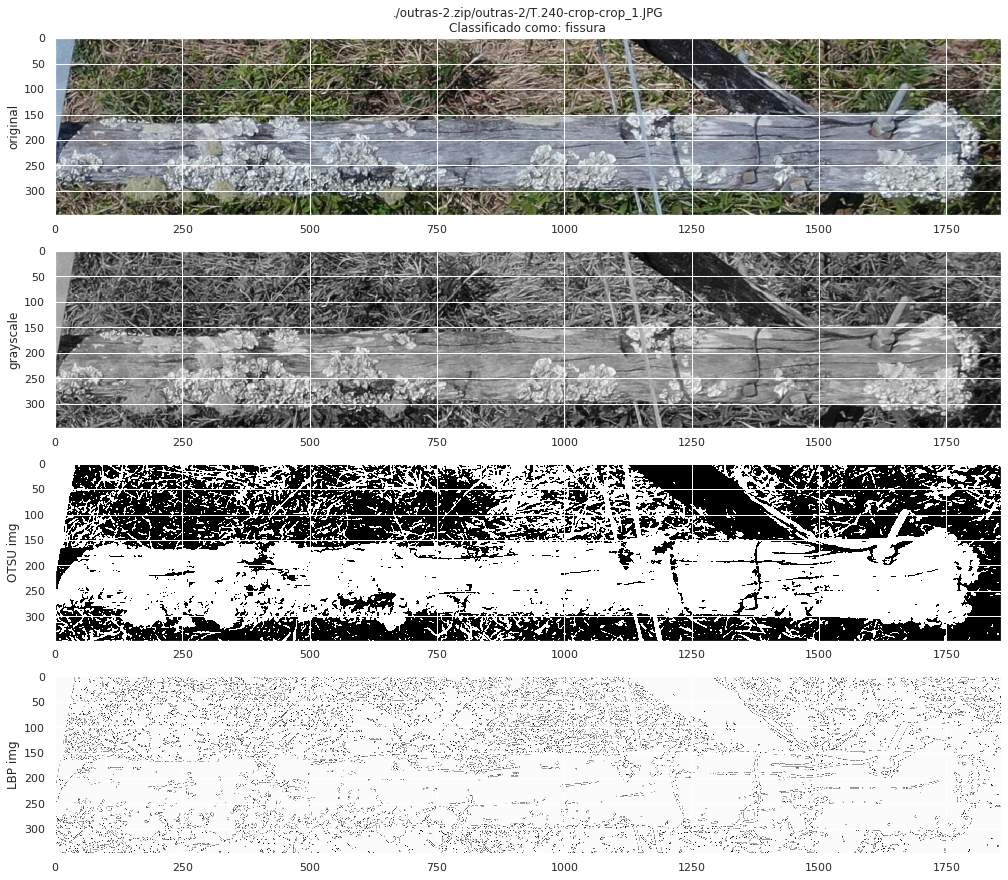

Probabilidades:
normal:0.30064967772960083
broca:0.16873615456984362
fissura:0.08691704247845221
musgo:0.4436971252221033


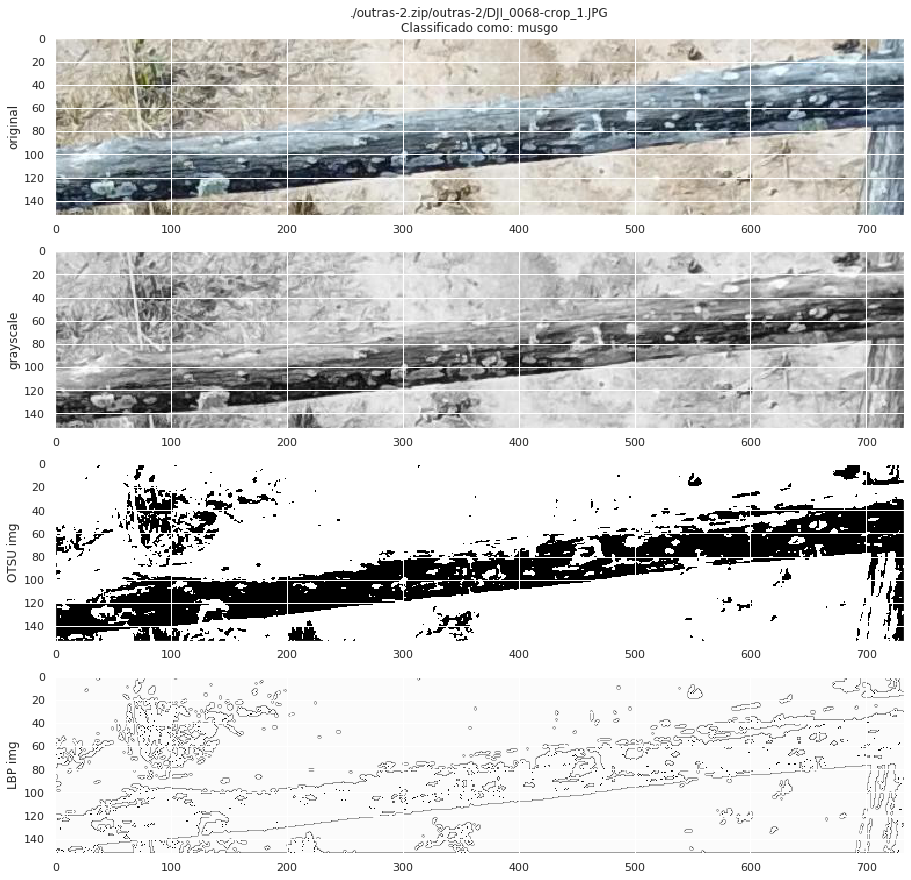

Probabilidades:
normal:0.27671520523202964
broca:0.1734874694094226
fissura:0.32959855295071544
musgo:0.2201987724078322


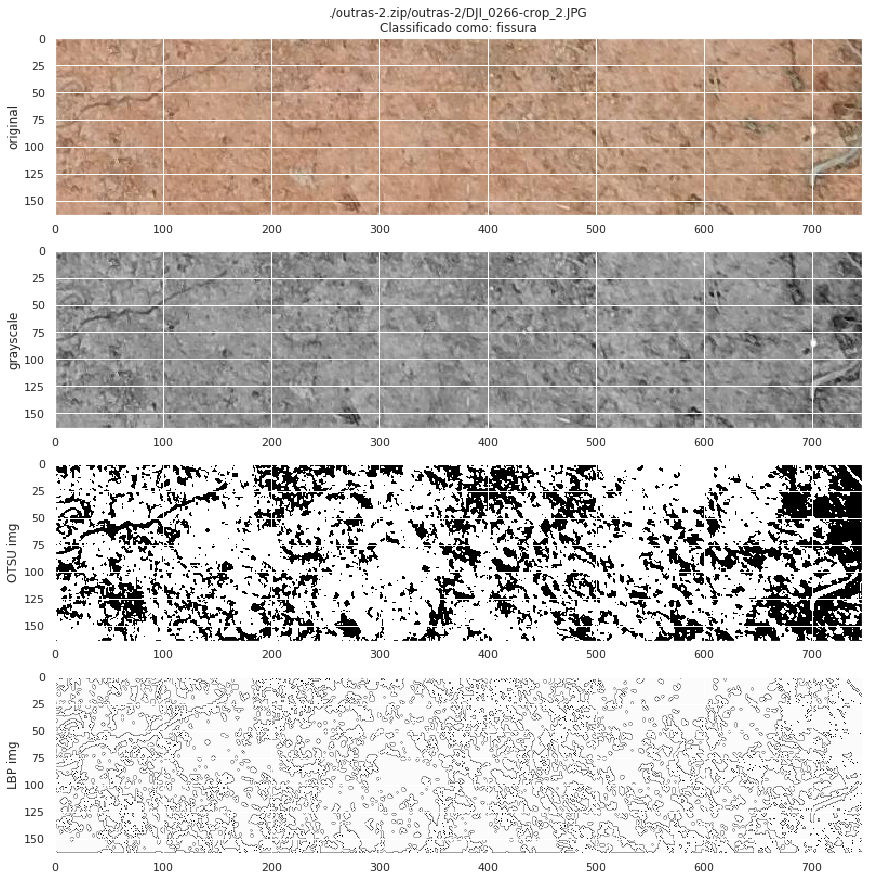

Probabilidades:
normal:0.2405329605447394
broca:0.2966807389559634
fissura:0.32114953987447176
musgo:0.14163676062482541


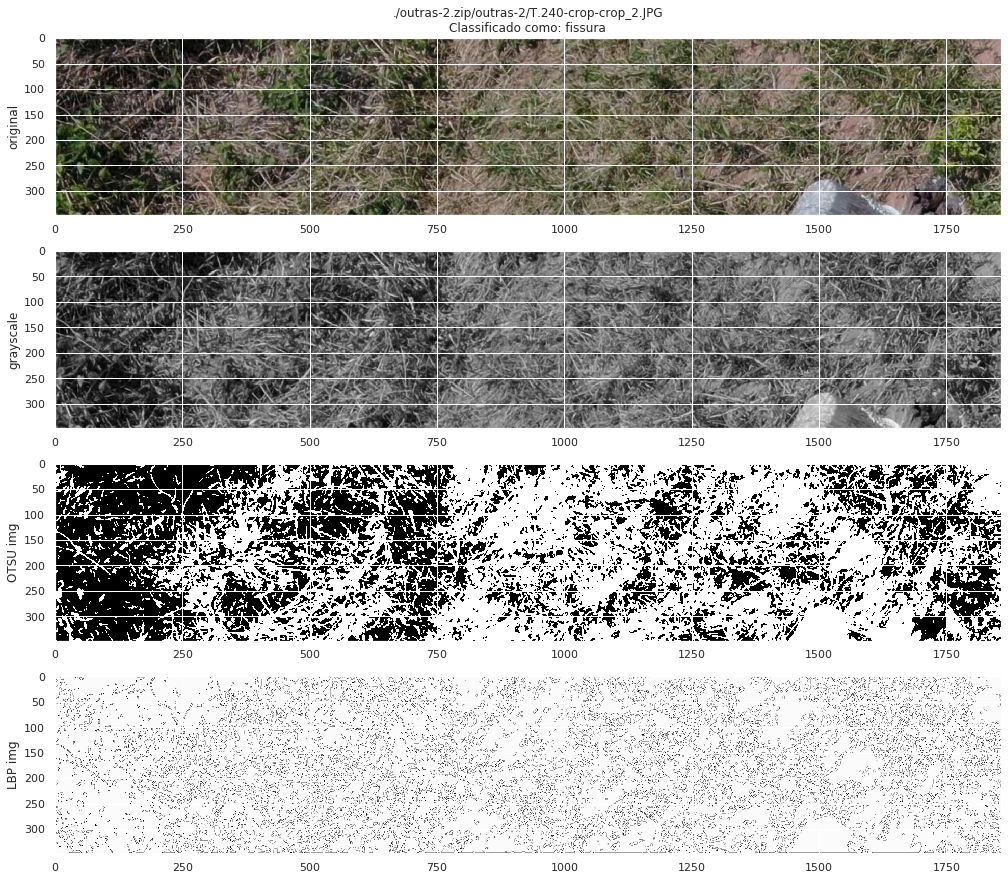

Probabilidades:
normal:0.35116566846155667
broca:0.14228950693860667
fissura:0.09940566339990839
musgo:0.40713916119992843


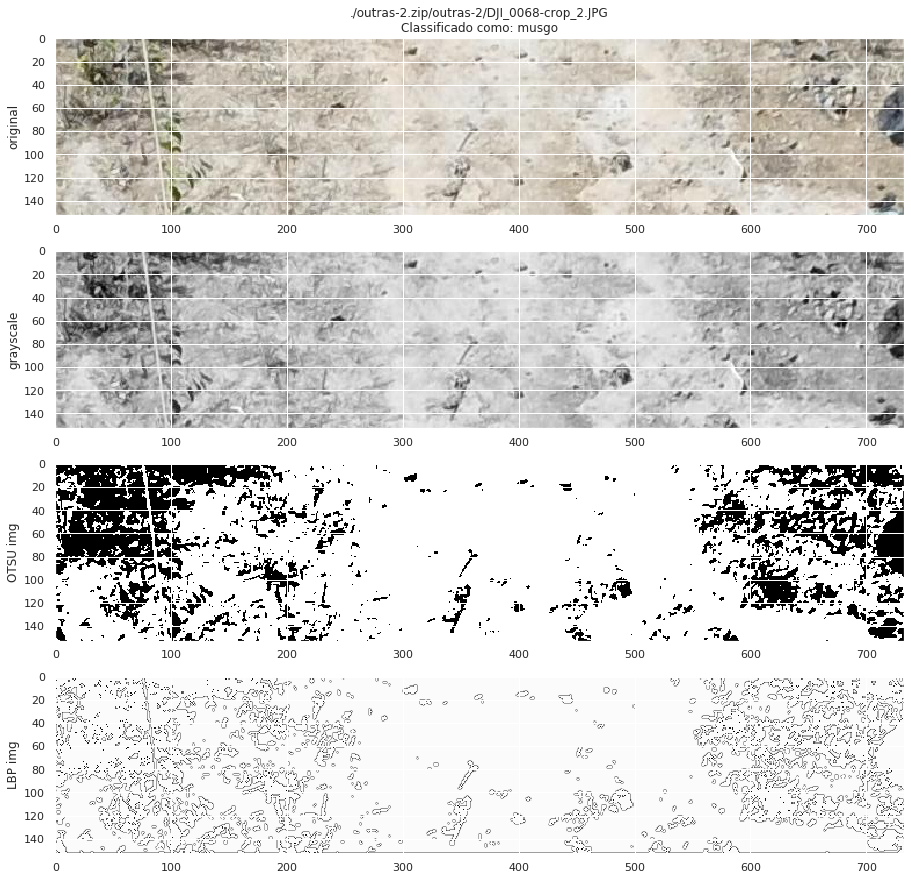

Probabilidades:
normal:0.3749267075408193
broca:0.23317396237952484
fissura:0.28587136249579653
musgo:0.1060279675838592


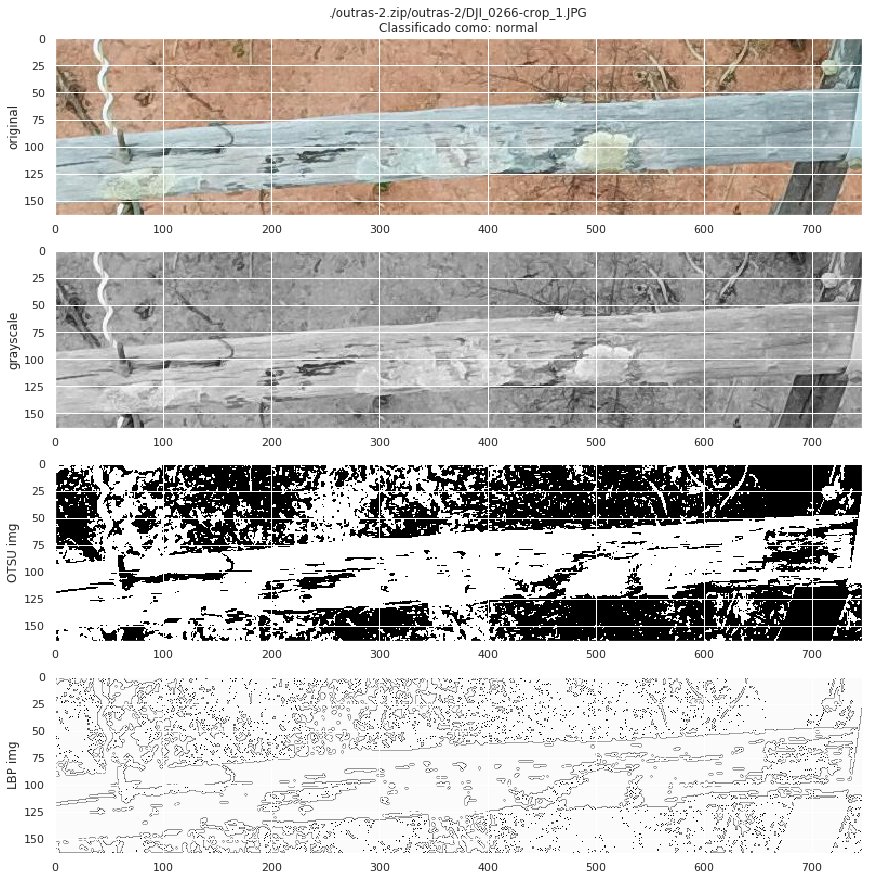

Probabilidades:
normal:0.2557386036479751
broca:0.3333124050867489
fissura:0.34157616927289813
musgo:0.06937282199237764


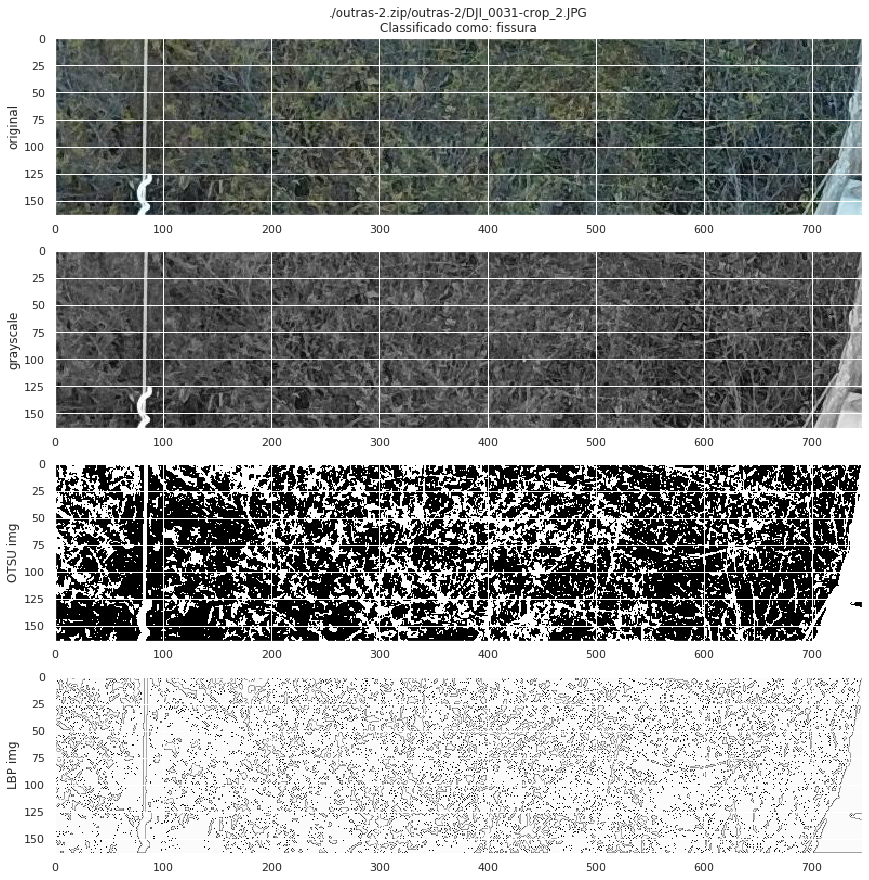

Probabilidades:
normal:0.3376453040158834
broca:0.19661270390934887
fissura:0.07502832635951229
musgo:0.3907136657152556


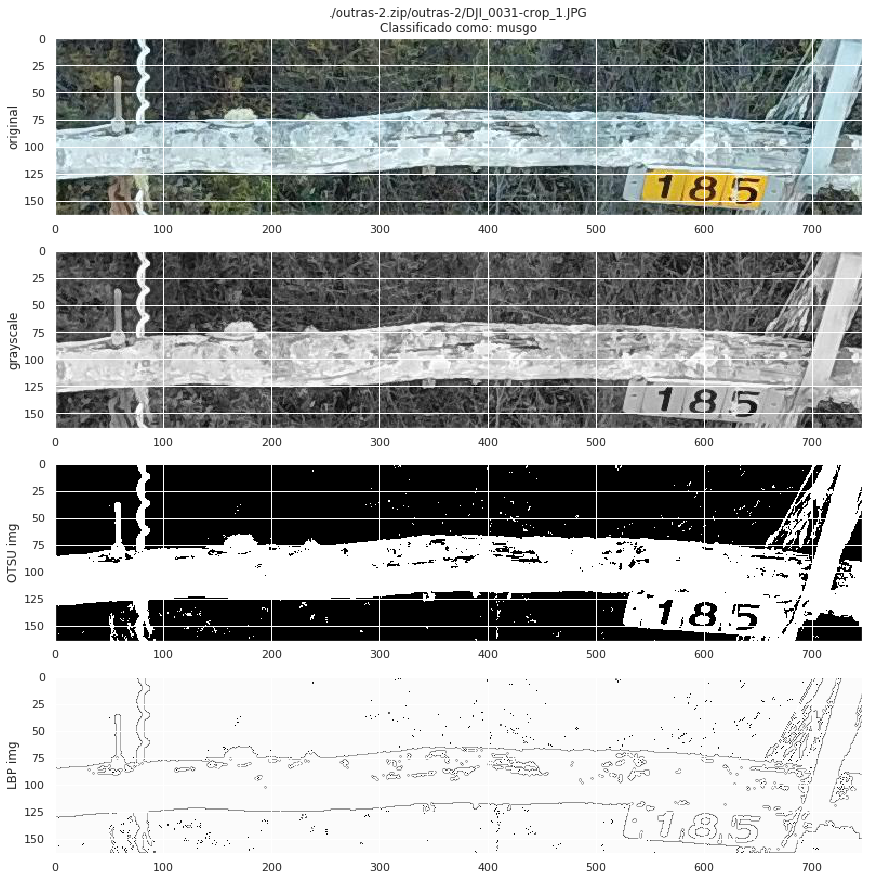

Probabilidades:
normal:0.3780602742378715
broca:0.20686098056910823
fissura:0.28043441771876965
musgo:0.13464432747425092


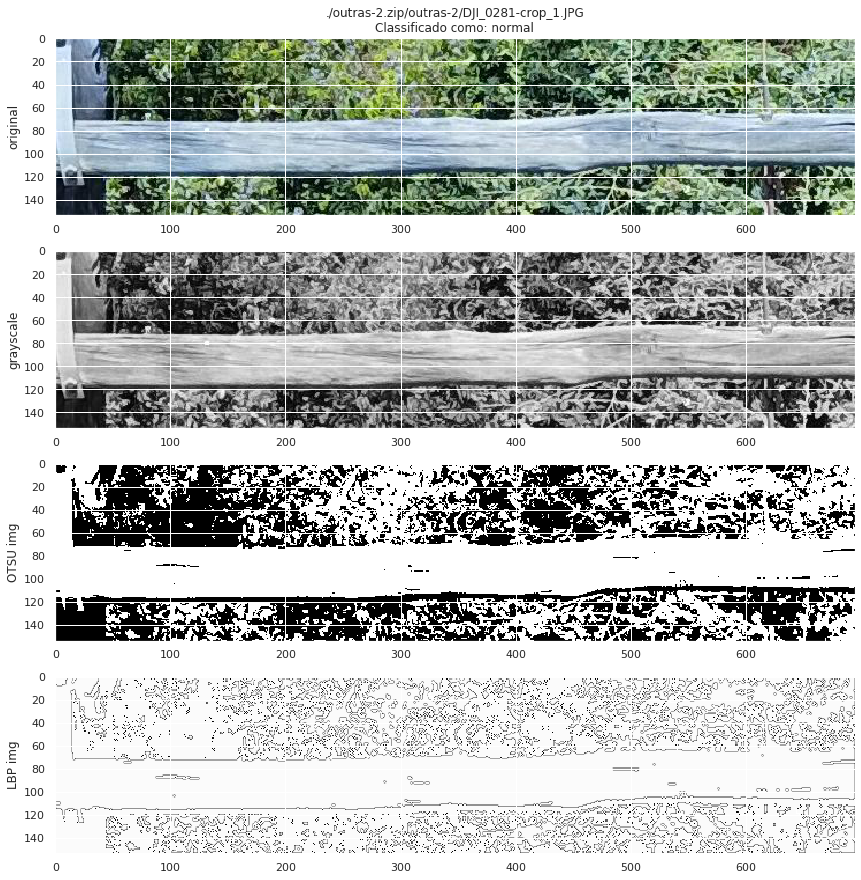

Probabilidades:
normal:0.19186858144231977
broca:0.3087356361746908
fissura:0.39933725662110525
musgo:0.10005852576188394


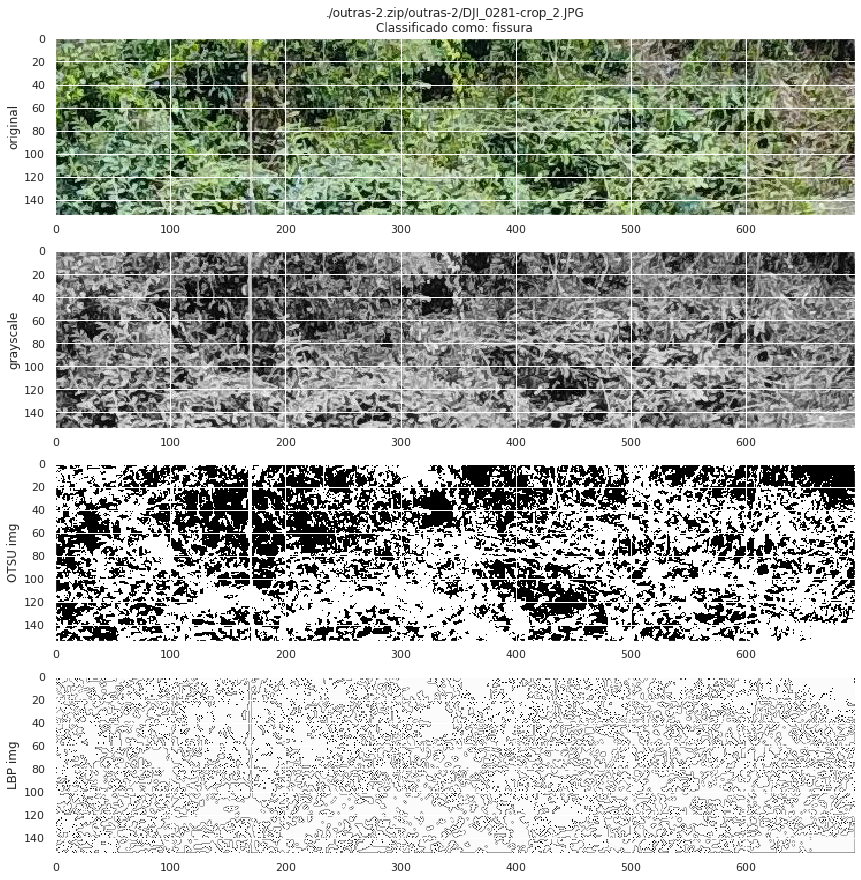

Probabilidades:
normal:0.3606953173920737
broca:0.2158920505861097
fissura:0.32332139850129815
musgo:0.10009123352051842


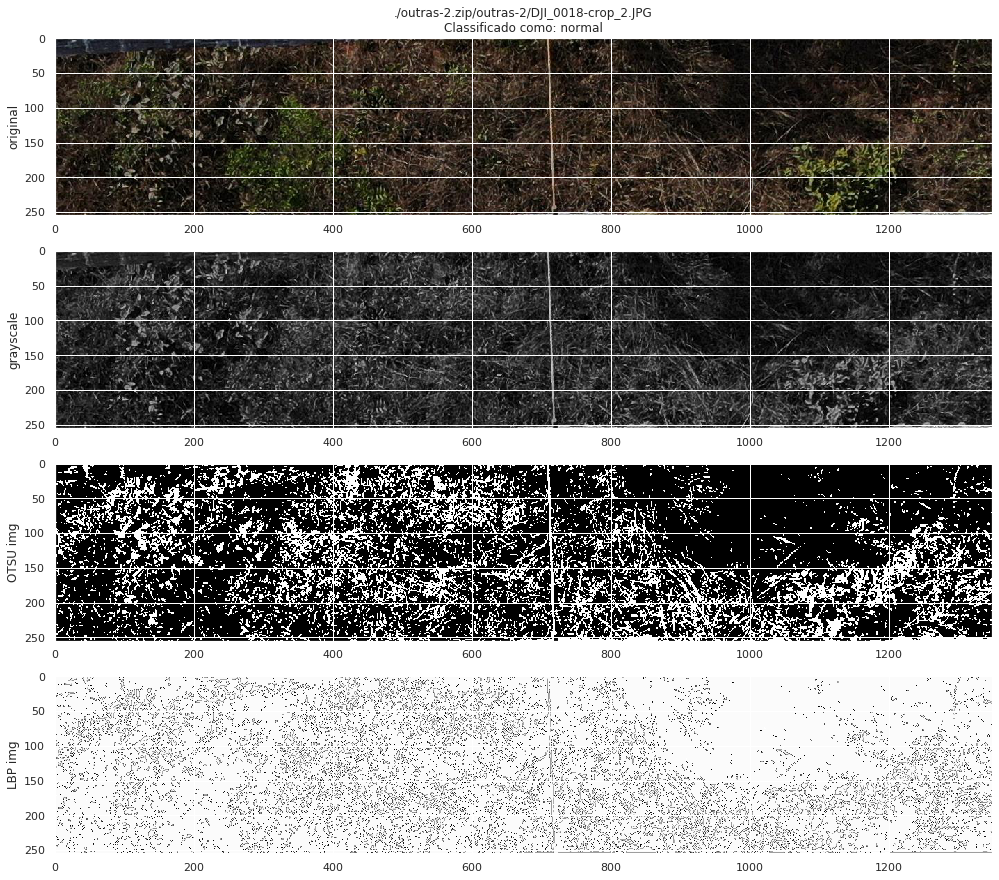

Probabilidades:
normal:0.20865658906814297
broca:0.41339592857225477
fissura:0.2796392299764618
musgo:0.09830825238314052


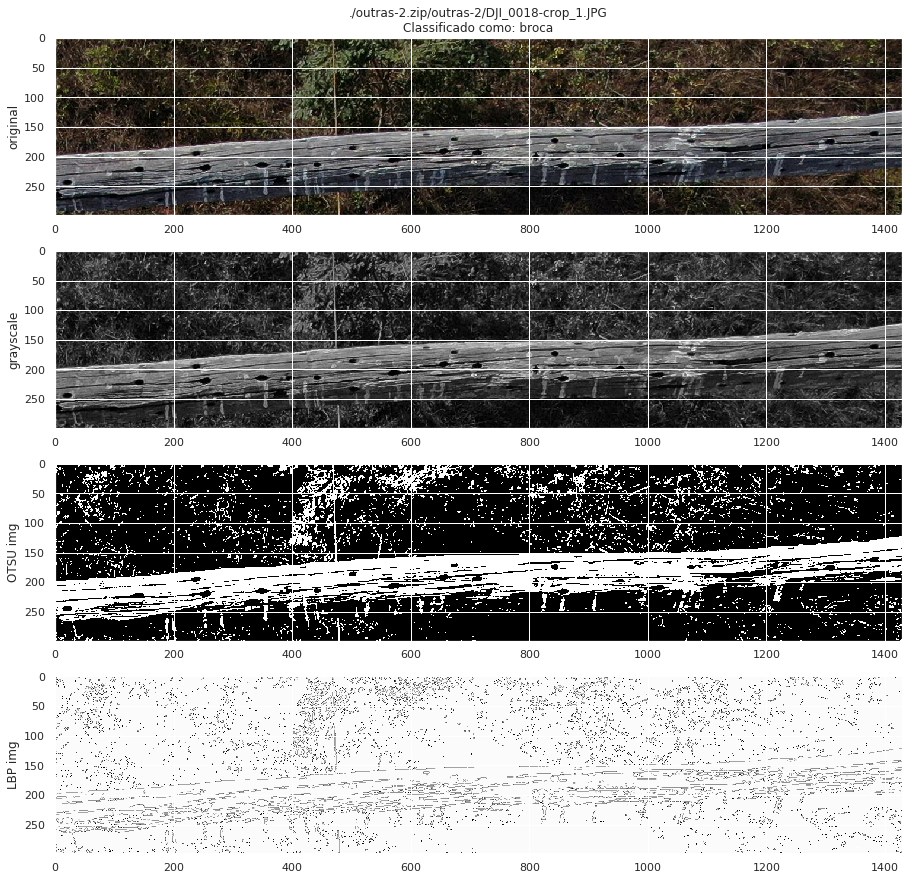

Probabilidades:
normal:0.36019459624596456
broca:0.16018630719438198
fissura:0.13270040490039214
musgo:0.34691869165926126


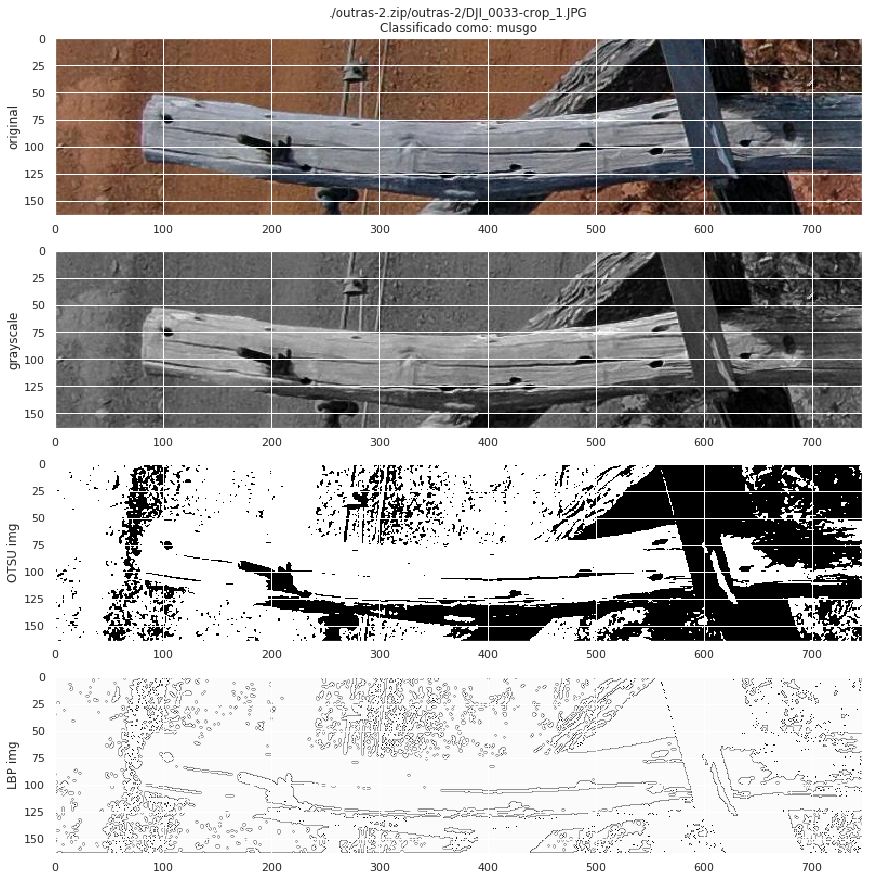

In [3]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('./csvs/otsu_lbp_toras.csv', index_col=0)

data_target = data.pop('target')
clf = make_pipeline(StandardScaler(), SVC(probability=True)).fit(data, data_target)

for path in data_dict:
  threshold, arr, lbp, img = data_dict[path]

  [y_pred] = clf.predict([arr])
  [y_prob] = clf.predict_proba([arr])

  fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(25, 15))
  ax[0].imshow(imread(path))
  ax[0].set_ylabel('original')
  ax[1].imshow(imread(path, as_gray=True))
  ax[1].set_ylabel('grayscale')
  ax[2].imshow(img)
  ax[2].set_ylabel('OTSU img')
  ax[3].imshow(lbp)
  ax[3].set_ylabel('LBP img')
  
  print('Probabilidades:')
  for name, prob in zip(TARGETS, y_prob):
    print(f'{name}:{prob}')
  
  ax[0].title.set_text(f'{path}\nClassificado como: {TARGETS[y_pred]}')
  plt.show()
